In [1]:
import fastai
from fastai.vision.all import *
import pandas as pd

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,balanced_accuracy_score
import numpy as np

In [3]:
sls = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/3200_sls.csv")

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
sls.head()

,id,kdprov,kdkab,kdkec,kddesa,iddesa,idslsnon,nmslsnon,ketua_sls,jenis,...,j_bstt,j_bsbtt,j_bstt_k,j_bskeko,j_segmen,dom,ldom,j_m_all,j_m_30,klas_ur
0,263884,32,1,10,1,3201010001,100,RT 001 RW 001 DUSUN 1,MUHAMAD RAFLI HIDAYAT,1,...,39,1,2,4,1,1,1,51,51,2
1,263885,32,1,10,1,3201010001,200,RT 002 RW 001 DUSUN 1,NURMAN,1,...,60,2,0,7,1,1,1,62,61,2
2,263886,32,1,10,1,3201010001,300,RT 003 RW 001 DUSUN 1,SAENUDIN,1,...,50,2,0,6,1,1,1,58,57,2
3,263887,32,1,10,1,3201010001,400,RT 004 RW 001 DUSUN 1,AEP,1,...,27,1,0,1,1,1,1,31,31,2
4,263888,32,1,10,1,3201010001,500,RT 005 RW 001 DUSUN 1,JEJEN JAELANI,1,...,49,7,3,8,3,1,1,63,57,2


In [5]:
sls.iddesa.unique().shape

(5957,)

In [8]:
ur_path = "C:/Users/jwst2/Python/tesis/jpg/UR/12. Resolution compare desa SPOT"
gen_path =  "C:/Users/jwst2/Python/tesis/jpg/general desa spot ES/"
test_path = 'C:/Users/jwst2/Python/tesis/jpg/UR/test sls 60m ES/'
model_code_dense = "D012"

In [9]:
os.chdir(ur_path)
if os.path.isdir('urban') is False:
    os.makedirs('urban')
    os.makedirs('rural')

In [12]:
yourpath = gen_path
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try :
            if(sls.klas_ur[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 1):
                shutil.copy(os.path.join(root, name), ur_path+"/urban/"+name)
            elif(sls.klas_ur[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 2):
                shutil.copy(os.path.join(root, name),ur_path+ "/rural/"+name)
        except Exception:
            print(name)
            pass 

0it [00:00, ?it/s]

3211080000.jpg
3211111000.jpg
3217000000.jpg


1it [00:18, 18.81s/it]


### Run Dataset

In [13]:
path = Path.cwd() / (ur_path)

In [14]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('rural'),Path('urban')]

In [15]:
fname = (path/"rural").ls()[0]
fname

Path('rural/3201010001.jpg')

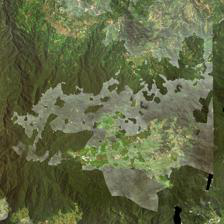

In [16]:
img = Image.open(fname)
img

In [17]:
blocks = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, # finds the images in the path
                 splitter=RandomSplitter(valid_pct=0.1, seed=42),  # default random split 80% training, 20% validation
                 get_y=parent_label # extracts the label category from the image's folder name 
                 ,item_tfms = Resize(224)) # data augmentation (mult multiplies the default transformation values)

In [26]:
dls = blocks.dataloaders(path, bs=4)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


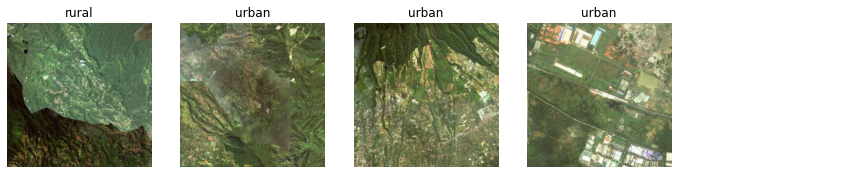

In [27]:
dls.show_batch(nrows=1, ncols=5)

In [33]:
avg = 'macro'
roca = RocAucBinary(average=avg)
f1s = F1Score(average=avg)
bc = BalancedAccuracy()
metrics=[accuracy,bc, Precision(average=avg), Recall(average=avg), f1s, roca]
learn = cnn_learner(dls, densenet121, metrics=metrics) 

In [34]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.890223,0.597552,0.752328,0.698384,0.692964,0.698384,0.695491,0.777200,03:41
1,0.576932,0.452394,0.810056,0.744534,0.765803,0.744534,0.753625,0.845707,03:45
2,0.536639,0.445261,0.804469,0.748936,0.756579,0.748936,0.752538,0.848907,03:49
3,0.519073,0.441378,0.783985,0.647945,0.764864,0.647945,0.666188,0.842593,03:57
4,0.459707,0.423274,0.800745,0.667811,0.804199,0.667811,0.691029,0.857711,04:00
5,0.468428,0.402348,0.800745,0.692616,0.771996,0.692616,0.713783,0.874991,03:56
6,0.383567,0.384614,0.806331,0.717152,0.769099,0.717152,0.734724,0.880544,03:56
7,0.426170,0.385110,0.830540,0.735972,0.817094,0.735972,0.760771,0.886806,03:56
8,0.367017,0.370966,0.815642,0.744266,0.775746,0.744266,0.756884,0.885993,03:56
9,0.400105,0.385376,0.823091,0.724616,0.806725,0.724616,0.748824,0.883623,03:56


C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (170250304 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (170250304 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (170250304 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (170250304 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (1702

In [ ]:
learn.fit_one_cycle(10)

In [36]:
learn.export("C:/Users/jwst2/Python/tesis/models/19042022"+ model_code_dense+".pkl")

### Sentinel

In [5]:
split = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/01 datasplit_ur_desa_uncovered.csv")

In [6]:
split = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/01 datasplit_ur_desa_uncovered.csv")

In [7]:
split

,iddesa,klas_ur,stat
0,3207110010,1,train
1,3205200018,1,train
2,3210070011,1,train
3,3211010004,1,train
4,3201290007,1,train
...,...,...,...
5373,3276040009,1,test
5374,3214070007,1,test
5375,3209120023,1,test
5376,3202280008,1,test


In [8]:
ur_path = "C:/Users/jwst2/Python/tesis/jpg/UR/12. Resolution compare desa sentinel"
gen_path =  "C:/Users/jwst2/Python/tesis/jpg/general desa sentinel ES RES/"
test_path = 'C:/Users/jwst2/Python/tesis/jpg/UR/test sls 60m ES/'
root_path = "C:/Users/jwst2/Python/tesis/jpg/general desa sentinel ES/"
model_code_dense_2 = "D013"

In [55]:
for desa in split.iddesa:
    desa = str(desa)
    shutil.copy(root_path +desa+".jpg", gen_path+desa+".jpg")
    

In [13]:
os.chdir(ur_path)
if os.path.isdir('urban') is False:
    os.makedirs('urban')
    os.makedirs('rural')

In [14]:
yourpath = gen_path
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try :
            if(sls.klas_ur[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 1):
                shutil.copy(os.path.join(root, name), ur_path+"/urban/"+name)
            elif(sls.klas_ur[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 2):
                shutil.copy(os.path.join(root, name),ur_path+ "/rural/"+name)
        except Exception:
            print(name)
            pass 

1it [00:21, 21.84s/it]


In [9]:
path = Path.cwd() / (ur_path)

In [10]:
blocks = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, # finds the images in the path
                 splitter=RandomSplitter(valid_pct=0.1, seed=42),  # default random split 80% training, 20% validation
                 get_y=parent_label # extracts the label category from the image's folder name 
                 ,item_tfms = Resize(128)) # data augmentation (mult multiplies the default transformation values)

In [11]:
dls = blocks.dataloaders(path,bs = 5)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


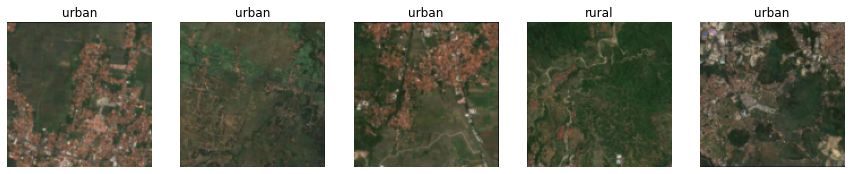

In [12]:
dls.show_batch(nrows=1, ncols=5)

In [13]:
avg = 'macro'
roca = RocAucBinary(average=avg)
f1s = F1Score(average=avg)
bc = BalancedAccuracy()
metrics=[accuracy,bc, Precision(average=avg), Recall(average=avg), f1s, roca]
learn_sen = cnn_learner(dls, densenet121, metrics=metrics) 

In [14]:
learn_sen.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.852940,0.647073,0.765363,0.661119,0.699044,0.661119,0.673358,0.742734,02:42
1,0.640646,0.532876,0.741155,0.653228,0.666364,0.653228,0.658655,0.756175,02:32
2,0.534959,0.500873,0.770950,0.617145,0.732652,0.617145,0.629229,0.768913,02:39
3,0.480389,0.392822,0.806331,0.713081,0.763236,0.713081,0.730390,0.870690,02:39
4,0.495060,0.406854,0.819367,0.698109,0.814522,0.698109,0.725519,0.868315,02:41
5,0.421206,0.480882,0.793296,0.669388,0.758054,0.669388,0.689981,0.815183,02:52
6,0.395361,0.369209,0.839851,0.764286,0.809540,0.764286,0.781790,0.886453,02:40
7,0.351033,0.370443,0.834264,0.777841,0.792443,0.777841,0.784527,0.884236,02:48
8,0.310377,0.396695,0.834264,0.747423,0.807830,0.747423,0.768639,0.869669,02:44
9,0.346049,0.387466,0.824953,0.749736,0.785373,0.749736,0.763945,0.871376,02:47


In [19]:
learn_sen.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.324079,0.403987,0.823091,0.728906,0.793239,0.728906,0.750256,0.875792,02:26


In [20]:
learn_sen.export("C:/Users/jwst2/Python/tesis/models/19042022"+ "D012B"+".pkl")